<a href="https://colab.research.google.com/github/anand008186/NLP--LLMs/blob/main/kerastuner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.corr()["Outcome"]

,Outcome
Pregnancies,0.221898
Glucose,0.466581
BloodPressure,0.065068
SkinThickness,0.074752
Insulin,0.130548
BMI,0.292695
DiabetesPedigreeFunction,0.173844
Age,0.238356
Outcome,1.000000


In [ ]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train.shape

(614, 8)

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout

In [ ]:
model = Sequential()
model.add(Dense(28, activation="relu", input_dim=8))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, batch_size=4, epochs=80, validation_data=(X_test, y_test))

Epoch 1/80
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6868 - loss: 0.6100 - val_accuracy: 0.6753 - val_loss: 0.5665
Epoch 2/80
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6558 - loss: 0.5705 - val_accuracy: 0.7403 - val_loss: 0.5215
Epoch 3/80
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7203 - loss: 0.5029 - val_accuracy: 0.7987 - val_loss: 0.5022
Epoch 4/80
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7694 - loss: 0.4722 - val_accuracy: 0.8052 - val_loss: 0.4948
Epoch 5/80
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7620 - loss: 0.4688 - val_accuracy: 0.8052 - val_loss: 0.4835
Epoch 6/80
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7860 - loss: 0.4373 - val_accuracy: 0.8052 - val_loss: 0.4797
Epoch 7/80
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7489 - loss: 0.4834 - val_accuracy: 0.8052 - val_loss: 0.4800
Epoch 8/80
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7600 - loss: 0.4560 - val_accuracy: 0.

In [ ]:
# check the accuracy of model
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7853 - loss: 0.4450 


[0.4955368936061859, 0.7792207598686218]

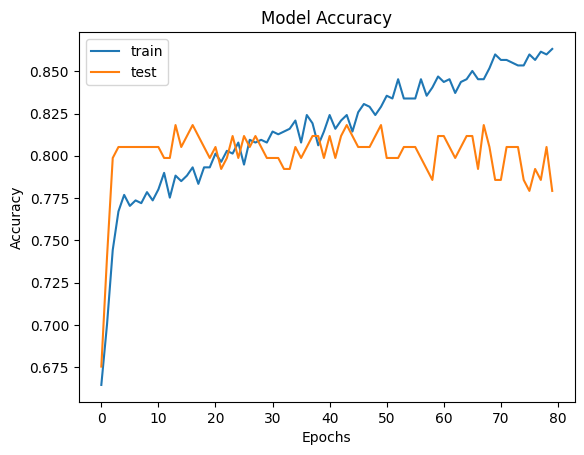

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

In [ ]:
# How to select appropriate optimizer
# No of Hidden layer


In [ ]:
pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.2 MB/s eta 0:00:00


In [ ]:
import kerastuner as kt

<ipython-input-9-5fd8096cdee5>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [ ]:
def build_model(hp):
  model = Sequential()
  model.add(Dense(32, activation="relu", input_dim=8))
  model.add(Dense(1, activation="sigmoid"))
  model.compile(optimizer=hp.Choice("optimizer", values=["adam", "sgd", "rmsprop","adadelta"]), loss="binary_crossentropy", metrics=["accuracy"])
  return model

In [ ]:
tuner = kt.RandomSearch(build_model, objective="val_accuracy", max_trials=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Trial 4 Complete [00h 00m 02s]
val_accuracy: 0.7532467246055603

Best val_accuracy So Far: 0.7662337422370911
Total elapsed time: 00h 00m 11s


In [ ]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'adam'}

In [ ]:
model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.7187 - loss: 0.5421 - val_accuracy: 0.7662 - val_loss: 0.5130
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7536 - loss: 0.5074 - val_accuracy: 0.7792 - val_loss: 0.5018
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7570 - loss: 0.5145 - val_accuracy: 0.7792 - val_loss: 0.4935
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7442 - loss: 0.5081 - val_accuracy: 0.7922 - val_loss: 0.4871
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7385 - loss: 0.4931 - val_accuracy: 0.7857 - val_loss: 0.4826
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7784 - loss: 0.4707 - val_accuracy: 0.7857 - val_loss: 0.4793
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7465 - loss: 0.4919 - val_accuracy: 0.7727 - val_loss: 0.4763
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7736 - loss: 0.4728 - val_accuracy: 0.7

In [ ]:
def build_model2(hp):
  model = Sequential()
  model.add(Dense(units = hp.Int("units", min_value=8, max_value=128, step=8), activation="relu", input_dim=8))
  model.add(Dense(1, activation="sigmoid"))
  model.compile(optimizer=hp.Choice("optimizer", values=["adam", "sgd", "rmsprop","adadelta"]), loss="binary_crossentropy", metrics=["accuracy"])
  return model


In [ ]:
tuner2 = kt.RandomSearch(build_model2, objective="val_accuracy", max_trials=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
tuner2.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 02s]
val_accuracy: 0.7727272510528564

Best val_accuracy So Far: 0.8181818127632141
Total elapsed time: 00h 00m 14s


In [ ]:
tuner2.get_best_hyperparameters()[0].values

{'units': 88, 'optimizer': 'rmsprop'}

In [ ]:
model2 = tuner2.get_best_models(num_models=1)[0]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
model2.fit(X_train, y_train, batch_size=32, epochs=100,initial_epoch=6, validation_data=(X_test, y_test))

Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7831 - loss: 0.4969 - val_accuracy: 0.7987 - val_loss: 0.4783
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7627 - loss: 0.4814 - val_accuracy: 0.7987 - val_loss: 0.4664
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7530 - loss: 0.4780 - val_accuracy: 0.7922 - val_loss: 0.4599
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7598 - loss: 0.4708 - val_accuracy: 0.7922 - val_loss: 0.4569
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7719 - loss: 0.4563 - val_accuracy: 0.7922 - val_loss: 0.4556
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8053 - loss: 0.4350 - val_accuracy: 0.7857 - val_loss: 0.4553
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7912 - loss: 0.4404 - val_accuracy: 0.7727 - val_loss: 0.4543
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7821 - loss: 0.4629 - val_accuracy: 0.78

In [ ]:
def build_model3(hp):
  model = Sequential()
  model.add(Dense(units = hp.Int("units", min_value=4, max_value=128, step=4), activation=hp.Choice("Activation",values=["relu","tanh","sigmoid"])  , input_dim=8))
  model.add(Dropout(hp.Choice("Dropout" ,values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))

  for i in range(hp.Int("num_layers", min_value=1, max_value=10)):
    model.add(Dense(units = hp.Int("units_" + str(i), min_value=8, max_value=128, step=8), activation=hp.Choice("Activation" + str(i),values=["relu","tanh","sigmoid"])))
    model.add(Dropout(hp.Choice("Dropout" +str(i) ,values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
  model.add(Dense(1, activation="sigmoid"))
  model.compile(optimizer=hp.Choice("optimizer", values=["adam", "sgd", "rmsprop","adadelta"]), loss="binary_crossentropy", metrics=["accuracy"])
  return model


In [ ]:
tuner= kt.RandomSearch(build_model3, objective="val_accuracy", max_trials=5,directory="Final_Drop",project_name="diabetes_fin")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 07s]
val_accuracy: 0.6428571343421936

Best val_accuracy So Far: 0.6428571343421936
Total elapsed time: 00h 00m 29s


In [ ]:
tuner.get_best_hyperparameters()[0].values

{'units': 32,
 'Activation': 'relu',
 'Dropout': 0.4,
 'num_layers': 4,
 'units_0': 48,
 'Activation0': 'sigmoid',
 'Dropout0': 0.6,
 'optimizer': 'adadelta',
 'units_1': 8,
 'Activation1': 'relu',
 'Dropout1': 0.1,
 'units_2': 8,
 'Activation2': 'relu',
 'Dropout2': 0.1,
 'units_3': 8,
 'Activation3': 'relu',
 'Dropout3': 0.1}

In [ ]:
model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adadelta', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=150, initial_epoch=5, validation_data=(X_test, y_test))

Epoch 6/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5463 - loss: 0.6777 - val_accuracy: 0.6429 - val_loss: 0.6551
Epoch 7/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5418 - loss: 0.6953 - val_accuracy: 0.6429 - val_loss: 0.6551
Epoch 8/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5755 - loss: 0.6820 - val_accuracy: 0.6429 - val_loss: 0.6551
Epoch 9/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5780 - loss: 0.6779 - val_accuracy: 0.6429 - val_loss: 0.6551
Epoch 10/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5793 - loss: 0.6717 - val_accuracy: 0.6429 - val_loss: 0.6551
Epoch 11/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6003 - loss: 0.6726 - val_accuracy: 0.6429 - val_loss: 0.6550
Epoch 12/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5710 - loss: 0.6785 - val_accuracy: 0.6429 - val_loss: 0.6550
Epoch 13/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6313 - loss: 0.6645 - val_accuracy: